# install lib and setup kaggle dataset

In [ ]:
!pip install datasets

In [ ]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=5342d2b50ce36d9ddeabe04989d0a5dbcdde45cceba6e2c6d49a22427cc80d86
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c classification-of-math-problems-by-kasut-academy

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 163MB/s]


In [ ]:
!unzip /content/classification-of-math-problems-by-kasut-academy.zip

Archive:  /content/classification-of-math-problems-by-kasut-academy.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# install lib fine tune

In [ ]:
# Step 1: Install Unsloth
!pip install unsloth
!pip uninstall -y unsloth && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.3/264.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9

Found existing installation: unsloth 2025.5.1
Uninstalling unsloth-2025.5.1:
  Successfully uninstalled unsloth-2025.5.1
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-wdddv1qd
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-wdddv1qd
  Resolved https://github.com/unslothai/unsloth.git to commit 3ce4cc6cf55352c6984229a24f0496f8f33ea4e3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.5.1-py3-none-any.whl size=264166 sha256=c03affe7da3d059c640aed3c4c1ed17f245cf70c9310c3f67342653147ddb4e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-jb9xqgfz/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth


# preparation + data + training

In [ ]:
import transformers

print(transformers.__version__)

4.38.0


In [ ]:
# Step 2: Load Model
from unsloth import FastLanguageModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
# needed as this function doesn't like it when the lm_head has its size changed
from unsloth import tokenizer_utils
def do_nothing(*args, **kwargs):
    pass
tokenizer_utils.fix_untrained_tokens = do_nothing

In [ ]:
import torch
major_version, minor_version = torch.cuda.get_device_capability()
print(f"Major: {major_version}, Minor: {minor_version}")
from datasets import load_dataset
import datasets
from trl import SFTTrainer
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
from unsloth import FastLanguageModel
from trl import SFTTrainer
from transformers import TrainingArguments, Trainer
from typing import Tuple
import warnings
from typing import Any, Dict, List, Union
from transformers import DataCollatorForLanguageModeling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Major: 8, Minor: 9


In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the device name
    device_name = torch.cuda.get_device_name(0)

    # Get device capability (major, minor)
    major_version, minor_version = torch.cuda.get_device_capability()

    # Print the information
    print(f"GPU: {device_name}")
    print(f"CUDA Capability: {major_version}.{minor_version}")
else:
    print("CUDA is not available. Using CPU instead.")

GPU: NVIDIA L4
CUDA Capability: 8.9


In [ ]:
!pip uninstall triton==3.3.0

Found existing installation: triton 3.3.0
Uninstalling triton-3.3.0:
  Would remove:
    /usr/local/bin/proton
    /usr/local/bin/proton-viewer
    /usr/local/lib/python3.11/dist-packages/triton-3.3.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/triton/*
Proceed (Y/n)? Y
  Successfully uninstalled triton-3.3.0


In [ ]:
!pip install triton==3.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.7.0 requires triton==3.3.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 3.2.0 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.


In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.28.0.37.27
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bitsandbytes==0.45.5
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0

In [ ]:
NUM_CLASSES = 8 # number of classes in the csv

max_seq_length = 2038 # Choose any! We auto support RoPE Scaling internally!
dtype = torch.float16 # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+

model_name = "unsloth/Qwen3-4B-Base";load_in_4bit = False
# model_name = "Qwen3-4B-Base";load_in_4bit = False

In [ ]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_name,load_in_4bit = load_in_4bit,
    max_seq_length = max_seq_length,
    dtype = None,
)

==((====))==  Unsloth 2025.5.1: Fast Qwen3 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

We now trim the classification head so the model can only say numbers 0-NUM_CLASSES and no other words. (We don't use 0 here but keeping it makes everything simpler)

In [ ]:
# number_token_ids = []
# for i in range(0, NUM_CLASSES):
#     print(i)
#     number_token_ids.append(tokenizer.encode(str(i), add_special_tokens=False)[0])
# # keep only the number tokens from lm_head
# par = torch.nn.Parameter(model.lm_head.weight[number_token_ids, :])

# old_shape = model.lm_head.weight.shape
# old_size = old_shape[0]
# print(par.shape)
# print(old_shape)

# model.lm_head.weight = par

# reverse_map = {value: idx for idx, value in enumerate(number_token_ids)} # will be used later to convert an idx from the old tokenizer to the new lm_head
# reverse_map

number_token_ids = []
for i in range(0, NUM_CLASSES):
    print(f"Encoding number: {i}")
    token_id = tokenizer.encode(str(i), add_special_tokens=False)[0]
    print(f"Token ID for {i}: {token_id}")
    number_token_ids.append(token_id)

print(f"All number token IDs: {number_token_ids}")

# keep only the number tokens from lm_head
par = torch.nn.Parameter(model.lm_head.weight[number_token_ids, :])
print(f"Filtered lm_head weight shape: {par.shape}")

old_shape = model.lm_head.weight.shape
old_size = old_shape[0]
print(f"Original lm_head weight shape: {old_shape}")
print(f"Original lm_head vocabulary size: {old_size}")

# Replacing model's lm_head with filtered weights
model.lm_head.weight = par
print("Replaced lm_head.weight with filtered parameters.")

reverse_map = {value: idx for idx, value in enumerate(number_token_ids)}
print(f"Reverse token ID mapping: {reverse_map}")

reverse_map

Encoding number: 0
Token ID for 0: 15
Encoding number: 1
Token ID for 1: 16
Encoding number: 2
Token ID for 2: 17
Encoding number: 3
Token ID for 3: 18
Encoding number: 4
Token ID for 4: 19
Encoding number: 5
Token ID for 5: 20
Encoding number: 6
Token ID for 6: 21
Encoding number: 7
Token ID for 7: 22
All number token IDs: [15, 16, 17, 18, 19, 20, 21, 22]
Filtered lm_head weight shape: torch.Size([8, 2560])
Original lm_head weight shape: torch.Size([151936, 2560])
Original lm_head vocabulary size: 151936
Replaced lm_head.weight with filtered parameters.
Reverse token ID mapping: {15: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7}


{15: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7}

In [ ]:
print("🔍 lm_head dtype:", model.lm_head.weight.dtype)

🔍 lm_head dtype: torch.bfloat16


In [ ]:
print("🔍 Non-fp16 parameters in model:")
for name, param in model.named_parameters():
    if param.dtype != torch.float16:
        print(f" - {name}: {param.dtype}")

🔍 Non-fp16 parameters in model:
 - model.embed_tokens.weight: torch.bfloat16
 - model.layers.0.self_attn.q_proj.weight: torch.bfloat16
 - model.layers.0.self_attn.k_proj.weight: torch.bfloat16
 - model.layers.0.self_attn.v_proj.weight: torch.bfloat16
 - model.layers.0.self_attn.o_proj.weight: torch.bfloat16
 - model.layers.0.self_attn.q_norm.weight: torch.bfloat16
 - model.layers.0.self_attn.k_norm.weight: torch.bfloat16
 - model.layers.0.mlp.gate_proj.weight: torch.bfloat16
 - model.layers.0.mlp.up_proj.weight: torch.bfloat16
 - model.layers.0.mlp.down_proj.weight: torch.bfloat16
 - model.layers.0.input_layernorm.weight: torch.bfloat16
 - model.layers.0.post_attention_layernorm.weight: torch.bfloat16
 - model.layers.1.self_attn.q_proj.weight: torch.bfloat16
 - model.layers.1.self_attn.k_proj.weight: torch.bfloat16
 - model.layers.1.self_attn.v_proj.weight: torch.bfloat16
 - model.layers.1.self_attn.o_proj.weight: torch.bfloat16
 - model.layers.1.self_attn.q_norm.weight: torch.bfloat16

In [ ]:
for name, param in model.named_parameters():
    if param.dtype == torch.float32:
        print(f"{name}: {param.dtype}")

In [ ]:
from peft import LoftQConfig

model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = [
        "lm_head", # can easily be trained because it now has a small size
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    # init_lora_weights = 'loftq',
    # loftq_config = LoftQConfig(loftq_bits = 4, loftq_iter = 1), # And LoftQ
)

print("trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Unsloth: Offloading output_embeddings to disk to save VRAM


Unsloth 2025.5.1 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


Unsloth: Training lm_head in mixed precision to save VRAM
trainable parameters: 33050624


In [ ]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs available:", torch.cuda.device_count())

PyTorch version: 2.7.0+cu126
CUDA available: True
Number of GPUs available: 1


In [ ]:
# Step 4: Prepare Dataset
import pandas as pd
from datasets import Dataset

# Load data
data = pd.read_csv("/content/train.csv")
# df.columns = ["problem", "label"]
data

,Question,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5
...,...,...
10184,Is there a first- or second-degree polynomial ...,0
10185,4. Let the side lengths of $\triangle A B C$ b...,1
10186,A triangular array of squares has one square i...,5
10187,Suppose we are given seven points that are equ...,1


In [ ]:
data.columns = ["problem", "label"]
data

,problem,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5
...,...,...
10184,Is there a first- or second-degree polynomial ...,0
10185,4. Let the side lengths of $\triangle A B C$ b...,1
10186,A triangular array of squares has one square i...,5
10187,Suppose we are given seven points that are equ...,1


In [ ]:
# 80/20 split
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

print(f"Total: {len(data)}")
print(f"Training size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")

Total: 10189
Training size: 8151
Validation size: 2038


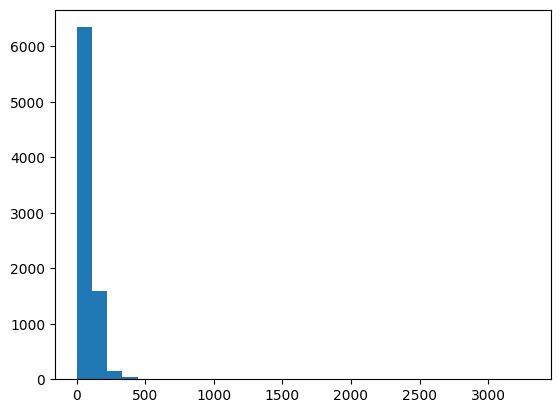

In [ ]:
token_counts = [len(tokenizer.encode(x)) for x in train_df.problem]
# plot the token counts
a = plt.hist(token_counts, bins=30)

In [ ]:
prompt = """Here is the Maths problem:
{}

Your task is to classify each Math problem into one of these eight topics.
class 0: Algebra
class 1: Geometry and Trigonometry
class 2: Calculus and Analysis
class 3: Probability and Statistics
class 4: Number Theory
class 5: Combinatorics and Discrete Math
class 6: Linear Algebra
class 7: Abstract Algebra and Topology

SOLUTION:
The correct answer is: class {}"""

def formatting_prompts_func(dataset_):
    texts = []
    for i in range(len(dataset_['problem'])):
        problem_ = dataset_['problem'].iloc[i]
        label_ = dataset_['label'].iloc[i]  # Make sure label corresponds to 0–7 as per the prompt

        text = prompt.format(problem_, label_)
        texts.append(text)
    return texts

# apply formatting_prompts_func to train_df
train_df['text'] = formatting_prompts_func(train_df)
train_dataset = datasets.Dataset.from_pandas(train_df,preserve_index=False)

In [ ]:
print(train_dataset[0]["text"])

Here is the Maths problem:
4. [6 points] Solve the inequality $4 x^{4}+x^{2}+4 x-5 x^{2}|x+2|+4 \geqslant 0$.

Your task is to classify each Math problem into one of these eight topics.
class 0: Algebra
class 1: Geometry and Trigonometry
class 2: Calculus and Analysis
class 3: Probability and Statistics
class 4: Number Theory
class 5: Combinatorics and Discrete Math
class 6: Linear Algebra
class 7: Abstract Algebra and Topology

SOLUTION:
The correct answer is: class 0


In [ ]:
train_dataset

Dataset({
    features: ['problem', 'label', 'text'],
    num_rows: 8151
})

In [ ]:
# this custom collator makes it so the model trains only on the last token of the sequence. It also maps from the old tokenizer to the new lm_head indices
class DataCollatorForLastTokenLM(DataCollatorForLanguageModeling):
    def __init__(
        self,
        *args,
        mlm: bool = False,
        ignore_index: int = -100,
        **kwargs,
    ):
        super().__init__(*args, mlm=mlm, **kwargs)
        self.ignore_index = ignore_index

    def torch_call(self, examples: List[Union[List[int], Any, Dict[str, Any]]]) -> Dict[str, Any]:
        batch = super().torch_call(examples)

        # for i in range(len(examples)):
        #     # Find the last non-padding token
        #     last_token_idx = (batch["labels"][i] != self.ignore_index).nonzero()[-1].item()
        #     # Set all labels to ignore_index except for the last token
        #     batch["labels"][i, :last_token_idx] = self.ignore_index
        #     # If the last token in the text is, for example, "2", then this was processed with the old tokenizer into number_token_ids[2]
        #     # But we don't actually want this because number_token_ids[2] could be something like 27, which is now undefined in the new lm_head. So we map it to the new lm_head index.
        #     # if this line gives you a keyerror then increase max_seq_length
        #     batch["labels"][i, last_token_idx] = reverse_map[ batch["labels"][i, last_token_idx].item() ]
        for i in range(len(examples)):
            label_sequence = batch["labels"][i]
            non_pad = (label_sequence != self.ignore_index).nonzero()
            if len(non_pad) == 0:
                continue

            last_token_idx = non_pad[-1].item()
            token_id = label_sequence[last_token_idx].item()

            if token_id in reverse_map:
                # Mask all except the last token
                batch["labels"][i, :last_token_idx] = self.ignore_index
                batch["labels"][i, last_token_idx] = reverse_map[token_id]
            else:
                print(f"⚠️ Skipping sample {i}: token ID {token_id} ({tokenizer.decode([token_id])}) not in reverse_map")
                batch["labels"][i] = self.ignore_index  # skip the entire sample



        return batch
collator = DataCollatorForLastTokenLM(tokenizer=tokenizer)

**Train the model**

Now let's use Huggingface TRL's SFTTrainer! More docs here: TRL SFT docs. We do 60 steps to speed things up, but you can set num_train_epochs=1 for a full run, and turn off max_steps=None. We also support TRL's DPOTrainer!

In [ ]:
is_fp16 = any(param.dtype == torch.float16 for param in model.parameters())
is_fp16

True

In [ ]:
not torch.cuda.is_bf16_supported()

True

In [ ]:
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    max_seq_length = max_seq_length,
    dataset_num_proc = 1,
    packing = False, # not needed because group_by_length is True
    args = TrainingArguments(
        per_device_train_batch_size = 8,
        gradient_accumulation_steps = 2,
        warmup_steps = 10,
        learning_rate = 1e-4,
        fp16 = False,
        bf16 = True,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "cosine",
        seed = 3407,
        output_dir = "outputs",
        num_train_epochs = 1,
        # report_to = "wandb",
        report_to = "none",
        group_by_length = True,
    ),
    data_collator=collator,
    dataset_text_field="text",
)

Unsloth: Tokenizing ["text"]:   0%|          | 0/8151 [00:00<?, ? examples/s]

In [ ]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA L4. Max memory = 22.161 GB.
8.283 GB of memory reserved.


In [ ]:
import torch
print("Torch version:", torch.__version__)
print("GPU:", torch.cuda.get_device_name(0))
print("Supports bf16:", torch.cuda.is_bf16_supported())
print("Supports fp16:", torch.cuda.get_device_capability(0)[0] >= 7)

Torch version: 2.7.0+cu126
GPU: NVIDIA L4
Supports bf16: True
Supports fp16: True


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 8,151 | Num Epochs = 1 | Total steps = 509
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 2 x 1) = 16
 "-____-"     Trainable parameters = 33,050,624/4,055,539,200 (0.81% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,0.878600
2,0.981400
3,0.846700
4,1.065000
5,1.096600
6,0.376100
7,0.576000
8,0.472600
9,1.151100
10,1.618700


⚠️ Skipping sample 0: token ID 1040 (class) not in reverse_map


In [ ]:
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

992.9998 seconds used for training.
16.55 minutes used for training.
Peak reserved memory = 12.627 GB.
Peak reserved memory for training = 4.344 GB.
Peak reserved memory % of max memory = 56.978 %.
Peak reserved memory for training % of max memory = 19.602 %.


In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
print()

In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import random

In [ ]:
# Save the current (trimmed) lm_head and bias
trimmed_lm_head = model.lm_head.weight.data.clone()
trimmed_lm_head_bias = model.lm_head.bias.data.clone() if hasattr(model.lm_head, "bias") and model.lm_head.bias is not None else torch.zeros(len(number_token_ids), device=trimmed_lm_head.device)

# Create a new lm_head with shape [old_size, hidden_dim]
hidden_dim = trimmed_lm_head.shape[1]
new_lm_head = torch.full((old_size, hidden_dim), 0, dtype=trimmed_lm_head.dtype, device=trimmed_lm_head.device)
new_lm_head_bias = torch.full((old_size,), -1000.0, dtype=trimmed_lm_head_bias.dtype, device=trimmed_lm_head_bias.device)

# Fill in the weights and bias for the allowed tokens (number_token_ids)
for new_idx, orig_token_id in enumerate(number_token_ids):
    new_lm_head[orig_token_id] = trimmed_lm_head[new_idx]
    new_lm_head_bias[orig_token_id] = trimmed_lm_head_bias[new_idx]

# Update the model's lm_head weight and bias
with torch.no_grad():
    new_lm_head_module = torch.nn.Linear(hidden_dim, old_size, bias=True, device=model.device)
    new_lm_head_module.weight.data.copy_(new_lm_head)
    new_lm_head_module.bias.data.copy_(new_lm_head_bias)
    model.lm_head.modules_to_save["default"] = new_lm_head_module

print(f"Remade lm_head: shape = {model.lm_head.weight.shape}. Allowed tokens: {number_token_ids}")

Remade lm_head: shape = torch.Size([151936, 2560]). Allowed tokens: [15, 16, 17, 18, 19, 20, 21, 22]


In [ ]:
# Prepare inference prompt
inference_prompt_template = prompt.split("class {}")[0] + "class "
inference_prompt_template

'Here is the Maths problem:\n{}\n\nYour task is to classify each Math problem into one of these eight topics.\nclass 0: Algebra\nclass 1: Geometry and Trigonometry\nclass 2: Calculus and Analysis\nclass 3: Probability and Statistics\nclass 4: Number Theory\nclass 5: Combinatorics and Discrete Math\nclass 6: Linear Algebra\nclass 7: Abstract Algebra and Topology\n\nSOLUTION:\nThe correct answer is: class '

# val data

In [ ]:
val_df.columns = ["text", "label"]
val_df

,text,label
8825,4・142 Solve the system of equations\n$$\left\{...,0
3172,4. The arithmetic sequence $\left\{a_{n}\right...,0
7780,10. The sum $\sum_{k=1}^{2020} k \cos \left(\f...,2
718,The sum of all values of $x$ that satisfy the ...,0
3133,"For a certain rectangular prism, the area of t...",1
...,...,...
10163,6. Find the smallest positive integer $n$ such...,5
4081,Let's determine those numbers $\overline{A B C...,4
4192,16. Fill in each square in $\square \square+\s...,5
8262,4. (20 points) Nезнayka came up with a passwor...,5


In [ ]:
# Sort validation set by length for efficient batching
val_df['token_length'] = val_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
val_df_sorted = val_df.sort_values(by='token_length').reset_index(drop=True)
val_df_sorted

,text,label,token_length
0,69. Factorize the number 899.,4,12
1,What is the least perfect square with 3 differ...,4,13
2,What is the smallest prime number that is grea...,4,14
3,How many positive even perfect cubes are less ...,4,15
4,Show that the subgroup of all rotations in a d...,7,18
...,...,...,...
2033,"In Pascal's Triangle, each entry is the sum of...",5,515
2034,"3. In a convex 12-sided polygon, all angles ar...",1,613
2035,"In the net drawn below, in how many ways can o...",5,698
2036,"The complete graph of $y=f(x),$ which consists...",2,782


In [ ]:
display = 50
batch_size = 2
device = model.device
correct = 0
results = []

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Collect all predictions and true labels
all_preds = []
all_trues = []

with torch.inference_mode():
    for i in tqdm(range(0, len(val_df_sorted), batch_size), desc="Evaluating"):
        batch = val_df_sorted.iloc[i:i+batch_size]
        prompts = [inference_prompt_template.format(text) for text in batch['text']]
        inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=max_seq_length).to(device)
        logits = model(**inputs).logits
        last_idxs = inputs.attention_mask.sum(1) - 1
        last_logits = logits[torch.arange(len(batch)), last_idxs, :]
        probs_all = F.softmax(last_logits, dim=-1)
        probs = probs_all[:, number_token_ids]
        preds = torch.argmax(probs, dim=-1).cpu().numpy()

        true_labels = batch['label'].tolist()
        all_preds.extend(preds)
        all_trues.extend(true_labels)

        for j in range(len(batch)):
            results.append({
                "text": batch['text'].iloc[j][:200],
                "true": true_labels[j],
                "pred": preds[j],
                "probs": probs[j][1:].float().cpu().numpy(),
                "ok": preds[j] == true_labels[j]
            })

# Calculate performance metrics
accuracy = accuracy_score(all_trues, all_preds)
macro_f1 = f1_score(all_trues, all_preds, average='macro')
micro_f1 = f1_score(all_trues, all_preds, average='micro')
weighted_f1 = f1_score(all_trues, all_preds, average='weighted')
precision = precision_score(all_trues, all_preds, average='macro')
recall = recall_score(all_trues, all_preds, average='macro')
cm = confusion_matrix(all_trues, all_preds)
report = classification_report(all_trues, all_preds, digits=3)

# Print results
print(f"\n📊 Validation Accuracy: {accuracy * 100:.2f}%")
print(f"🔹 Macro F1-score:     {macro_f1:.3f}")
print(f"🔹 Micro F1-score:     {micro_f1:.3f}")
print(f"🔹 Weighted F1-score:  {weighted_f1:.3f}")
print(f"🔹 Precision (macro):  {precision:.3f}")
print(f"🔹 Recall (macro):     {recall:.3f}")

print("\n🔍 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", cm)

# Optional: random samples
print("\n--- Random samples ---")
for s in random.sample(results, min(display, len(results))):
    print(f"\nText: {s['text']}")
    print(f"True: {s['true']}  Pred: {s['pred']} {'✅' if s['ok'] else '❌'}")
    print("Probs:", ", ".join([f"{k}: {v:.3f}" for k, v in enumerate(s['probs'], start=1)]))

Evaluating: 100%|██████████| 128/128 [00:18<00:00,  6.92it/s]


📊 Validation Accuracy: 85.72%
🔹 Macro F1-score:     0.786
🔹 Micro F1-score:     0.857
🔹 Weighted F1-score:  0.857
🔹 Precision (macro):  0.797
🔹 Recall (macro):     0.782

🔍 Classification Report:
               precision    recall  f1-score   support

           0      0.859     0.866     0.863       522
           1      0.899     0.922     0.910       500
           2      0.825     0.810     0.817       221
           3      0.785     0.810     0.797        63
           4      0.843     0.846     0.845       331
           5      0.862     0.831     0.847       362
           6      0.609     0.700     0.651        20
           7      0.692     0.474     0.562        19

    accuracy                          0.857      2038
   macro avg      0.797     0.782     0.786      2038
weighted avg      0.857     0.857     0.857      2038

🧮 Confusion Matrix:
 [[452  16  17   6  16  13   2   0]
 [ 18 461   7   1   3   5   4   1]
 [ 16  11 179   0   7   5   0   3]
 [  7   2   1  51   0   1

# test data

In [ ]:
test_df = pd.read_csv("/content/test.csv")
# test_df.columns = ["text", "label"]
test_df

,id,Question
0,0,b'Solve 0 = -i - 91*i - 1598*i - 64220 for i.\n'
1,1,Galperin G.A.\n\nA natural number $N$ is 999.....
2,2,Example 7 Calculate $\frac{1}{2 \sqrt{1}+\sqrt...
3,3,"If $A$, $B$, and $C$ represent three distinct ..."
4,4,2. Calculate $1+12+123+1234+12345+123456+12345...
...,...,...
3039,3039,"Find the greatest possible value of $pq + r$, ..."
3040,3040,"4. Given that $a, b, c$ are the lengths of the..."
3041,3041,"3.18. Find the eccentricity, coordinates of th..."
3042,3042,Find the least positive integer $k$ for which ...


In [ ]:
import pandas as pd
import torch
from tqdm import tqdm
import torch.nn.functional as F
import gc

# Step 1: Load test data
test_df = pd.read_csv("/content/test.csv")  # replace with actual path if not already loaded

# Step 2: Prepare the text prompt
test_df['text'] = test_df['Question'].apply(lambda x: inference_prompt_template.format(x.decode() if isinstance(x, bytes) else x))

# Step 3: Compute token lengths and sort for batching
test_df['token_length'] = test_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
test_df_sorted = test_df.sort_values(by='token_length').reset_index(drop=True)

# Step 4: Predict
batch_size = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions = []

model.eval()
with torch.inference_mode():
    for i in tqdm(range(0, len(test_df_sorted), batch_size), desc="Predicting"):
        batch = test_df_sorted.iloc[i:i+batch_size]
        prompts = batch['text'].tolist()
        inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=max_seq_length).to(device)
        logits = model(**inputs).logits
        last_idxs = inputs.attention_mask.sum(1) - 1
        last_logits = logits[torch.arange(len(batch)), last_idxs, :]
        probs_all = F.softmax(last_logits, dim=-1)
        probs = probs_all[:, number_token_ids]  # Only use the reduced lm_head tokens
        preds = torch.argmax(probs, dim=-1).cpu().tolist()
        predictions.extend(preds)

# Step 5: Reorder predictions to original test_df order
test_df_sorted['label'] = predictions
submission_df = test_df_sorted.sort_values(by='id')[['id', 'label']].reset_index(drop=True)

# Step 6: Save to CSV
submission_df.to_csv("submission.csv", index=False)
print("✅ Submission file saved as 'submission.csv'")

Predicting: 100%|██████████| 1522/1522 [03:04<00:00,  8.26it/s]

✅ Submission file saved as 'submission.csv'
